In [1]:
import torch
torch.cuda.set_device(0)
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.1+cu110 _CudaDeviceProperties(name='GeForce 940MX', major=5, minor=0, total_memory=2048MB, multi_processor_count=3)


In [2]:
from IPython.display import display
import cv2, numpy as np
from PIL import Image, ImageDraw, ImageFont

In [3]:
from utils import Tools
tools = Tools('data/')

In [4]:
from datasets import Single_word, Real_word
from torch.utils.data import DataLoader

In [9]:
# dataset = Single_word(5000, real_dir='imgs/real/')
dataset = Single_word(50)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)
# dataset_real = Real_word('imgs/real/')
# dataloader = DataLoader(dataset_real, batch_size=8, shuffle=True, num_workers=0)

In [6]:
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn
from cnn_net import Net

In [7]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Predicted as 翌


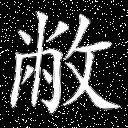

epoch: 0
Predicted as 翌


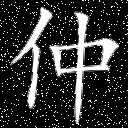

epoch: 1
Training Finished.


In [10]:
for epoch in range(2):
    for i, data in enumerate(dataloader):
        # data：[4x1x32x32, 4]
        inputs, labels = data
        # 从tensor转为variable
        inputs, labels = Variable(inputs), Variable(labels)
        # 将参数梯度归零
        optimizer.zero_grad()
        # 前向传播
        outputs = net(inputs)
        labels = labels.long()
        # 交叉熵计算损失
        loss = criterion(outputs, labels)
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
        # 每2000批随机测试
        # test_img使用了Ipython.display中的display
        # 在jupyter notebook中可以显示测试图片
        if i % 2000 == 0:
            dataset.test_img(net)
            # dataset_real.test_img(net, dataset_real.path+np.random.choice(dataset_real.img_names))
    print(f'epoch: {epoch}')
print('Training Finished.')

0.1585942779905384


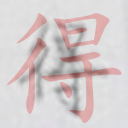

In [11]:
ch = '得'
model = torch.load('weights/CNN_model_5000_20e_3727_10e_76_3e.pt')
score, result = tools.evaluate_word(f'imgs/real/{ch}.jpg', model)
print(score)
result
